### ABSTRACT:
#### This study focuses on classifying emails as spam or ham (non-spam) using the Naive Bayes classification algorithm. The dataset consists of emails labeled as either spam or ham, along with their corresponding text content.

#### After preprocessing the text data (e.g., removing punctuation, converting to lowercase), the Naive Bayes model is trained on a portion of the dataset and evaluated using metrics such as accuracy, precision, recall, and F1-score. The model's performance is then assessed by predicting the labels for the remaining portion of the dataset.

#### The results demonstrate the effectiveness of the Naive Bayes algorithm in classifying emails as spam or ham based on their text content. However, further preprocessing and feature engineering techniques could potentially improve the model's performance. Overall, this study highlights the utility of Naive Bayes in email spam classification tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
ham_spam=data.spam.value_counts()
ham_spam

0    4360
1    1368
Name: spam, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
data['text']=data['text'].str.lower()
data.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [8]:
# remove punctns
import string
punc_to_rmv=string.punctuation
def remove_punctaution(text):
    translator = str.maketrans("", "",punc_to_rmv)
    return text.translate(translator)
data['text']  

0       subject: naturally irresistible your corporate...
1       subject: the stock trading gunslinger  fanny i...
2       subject: unbelievable new homes made easy  im ...
3       subject: 4 color printing special  request add...
4       subject: do not have money , get software cds ...
                              ...                        
5723    subject: re : research and development charges...
5724    subject: re : receipts from visit  jim ,  than...
5725    subject: re : enron case study update  wow ! a...
5726    subject: re : interest  david ,  please , call...
5727    subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

#### NLTK stands for Natural Language Toolkit. It is a powerful Python library for working with human language data, particularly in the field of natural language processing (NLP) and text processing. NLTK provides easy-to-use interfaces to perform various tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, parsing, and more.

In [9]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Define a function lemmatize_words that lemmatizes each word in a given text and joins them back into a string:

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["text"] = data["text"].apply(lambda text: lemmatize_words(text))
data.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny is...,1
2,subject: unbelievable new home made easy im wa...,1
3,subject: 4 color printing special request addi...,1
4,"subject: do not have money , get software cd f...",1


In [11]:
X = data.text
y = data.spam

In [12]:

from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(X)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df.head()

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
coun_vect.vocabulary_

{'subject': 30075,
 'naturally': 21821,
 'irresistible': 17572,
 'your': 34400,
 'corporate': 9504,
 'identity': 16513,
 'lt': 19748,
 'is': 17582,
 'really': 26097,
 'hard': 15558,
 'to': 31384,
 'recollect': 26213,
 'company': 8817,
 'the': 31062,
 'market': 20233,
 'full': 14406,
 'of': 22664,
 'suqgestions': 30314,
 'and': 4746,
 'information': 17023,
 'isoverwhelminq': 17618,
 'but': 7245,
 'good': 15019,
 'catchy': 7692,
 'logo': 19573,
 'stylish': 30056,
 'statlonery': 29737,
 'outstanding': 23217,
 'website': 33516,
 'will': 33790,
 'make': 20026,
 'task': 30721,
 'much': 21506,
 'easier': 11843,
 'we': 33459,
 'do': 11324,
 'not': 22350,
 'promise': 25277,
 'that': 31053,
 'havinq': 15661,
 'ordered': 23002,
 'iogo': 17497,
 'automaticaily': 5603,
 'become': 6093,
 'world': 34023,
 'ieader': 16530,
 'it': 17643,
 'isguite': 17597,
 'ciear': 8254,
 'without': 33905,
 'product': 25185,
 'effective': 12032,
 'business': 7230,
 'organization': 23037,
 'practicable': 24818,
 'aim':

In [14]:
#shape of count vector: number of rows and unique words
count_matrix.shape

(5728, 34677)

In [15]:
coun_vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [16]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2))
X_vect = vect.fit_transform(X)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [18]:
tokens = vect.get_feature_names_out()
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])

df_idf.head()

,idf_weights
00,2.883654
00 00,5.376630
00 000,8.267002
00 0009249480,8.960149
00 0011,8.960149


In [19]:
#get tfidf vector for first document
first_document_vector=X_tfidf[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
logo,0.221116
promise,0.126202
effective,0.104410
company,0.101354
content,0.098670
...,...
entered europe,0.000000
entered etter,0.000000
entered eastern,0.000000
entered drawing,0.000000


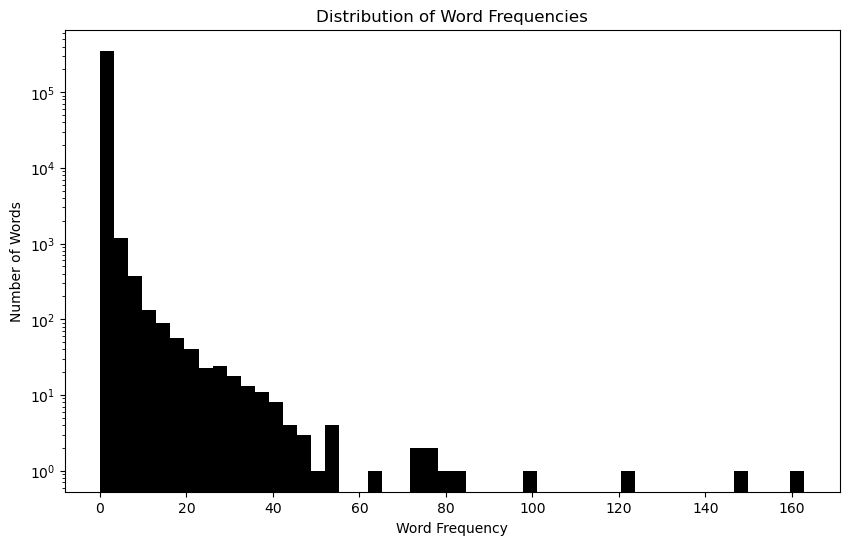

In [20]:
# Sum up the word frequencies
word_frequencies = X_tfidf.sum(axis=0)

# Convert to a list for easier handling
word_frequencies = word_frequencies.tolist()[0]

# Step 2: Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, log=True,color='black')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [22]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.20, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(6976, 353900)
(1744, 353900)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

mnb = MultinomialNB()
naive_model = mnb.fit(X_train,y_train)
y_pred_class = mnb.predict(X_test)

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       859
           1       0.99      1.00      0.99       885

    accuracy                           0.99      1744
   macro avg       0.99      0.99      0.99      1744
weighted avg       0.99      0.99      0.99      1744



In [25]:
import joblib
joblib.dump(naive_model, 'naive_model1.joblib')
joblib.dump(vect, 'CountVectorizer.joblib')
joblib.dump(tfidf_transformer, 'tfidf_transformer.joblib')

['tfidf_transformer.joblib']

In [26]:
model = joblib.load('naive_model1.joblib')
vect = joblib.load('CountVectorizer.joblib')
tfidf = joblib.load('tfidf_transformer.joblib')

text1 ="your son has been arrested and needs $8500"
text2 = "new models on kaggle to checkout!"

preprocessed_text = vect.transform([text1])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is spam!!!")
else:
    print("The email is not spam")

[1]
The email is spam!!!


In [27]:
text2 = "Hi,improve your coding skills with alphabet rangoli"

preprocessed_text = vect.transform([text2])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The email is spam!!!")
else:
    print("The email is not spam")

[0]
The email is not spam
